In [1]:
import polars as pl
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

sns.set_theme()

In [3]:
# Cargamos el dataset
df = pl.read_csv('https://archivo.datos.cdmx.gob.mx/suac/locatel0311-completa.csv', infer_schema_length=10000)

In [4]:
df.head()

id_folio,fecha_solicitud,hora_solicitud,tipo_de_entrada,tema_solicitud,sexo,edad,estatus,fecha_concluido,alcaldia,colonia_datos,0311_colonia_registro,codigo_postal_solicitud,latitud,longitud
str,str,str,str,str,str,str,str,str,str,str,str,str,f64,f64
"""- 241""","""2019-06-02""","""22:37:44""","""VICTORIA""","""PODA / RETIRO ARBOL""","""NO ESPECIFICADO""","""NA""","""TURNADO""","""NA""","""NA""","""NA""","""NA""","""NA""",0.0,0.0
"""- 100895""","""2019-09-05""","""10:35:08""","""VICTORIA""","""FALTA DE AGUA""","""NO ESPECIFICADO""","""NA""","""TURNADO""","""NA""","""NA""","""NA""","""NA""","""NA""",0.0,0.0
"""- 7535""","""2019-06-05""","""15:36:48""","""VICTORIA""","""PODA / RETIRO ARBOL""","""NO ESPECIFICADO""","""NA""","""ATENDIDO""","""2021-03-09""","""NA""","""NA""","""NA""","""NA""",0.0,0.0
"""- 27107""","""2019-07-01""","""20:35:21""","""VICTORIA""","""SOLICITUD DE VIGILANCIA""","""NO ESPECIFICADO""","""NA""","""ATENDIDO""","""2022-08-14""","""NA""","""NA""","""NA""","""NA""",0.0,0.0
"""- 59329""","""2019-08-04""","""00:58:17""","""VICTORIA""","""SOLICITUD/SEGURO DE DESEMPLEO""","""NO ESPECIFICADO""","""NA""","""ATENDIDO""","""2019-08-06""","""NA""","""NA""","""NA""","""NA""",0.0,0.0


In [5]:
df.tail()

id_folio,fecha_solicitud,hora_solicitud,tipo_de_entrada,tema_solicitud,sexo,edad,estatus,fecha_concluido,alcaldia,colonia_datos,0311_colonia_registro,codigo_postal_solicitud,latitud,longitud
str,str,str,str,str,str,str,str,str,str,str,str,str,f64,f64
"""- 1732423""","""2022-12-20""","""21:41:04""","""PORTAL CIUDADANO SUAC""","""FUGA DE AGUA""","""NA""","""NA""","""CERRADO""","""2023-01-14""","""AZCAPOTZALCO""","""NA""","""EL ROSARIO""","""02100""",0.0,0.0
"""- 1732687""","""2022-12-21""","""11:40:03""","""PORTAL CIUDADANO SUAC""","""ALUMBRADO""","""NA""","""NA""","""TURNADO""","""NA""","""GUSTAVO A. MADERO""","""NA""","""EL COYOL""","""07420""",0.0,0.0
"""- 1733047""","""2022-12-21""","""17:35:51""","""PORTAL CIUDADANO SUAC""","""QUEJA FUNCIONARIO""","""MASCULINO""","""NA""","""CERRADO""","""2023-01-10""","""CUAUHTEMOC""","""NA""","""ROMA NORTE""","""06700""",0.0,0.0
"""- 1736110""","""2022-12-27""","""06:39:58""","""PORTAL CIUDADANO SUAC""","""PODA / RETIRO ARBOL""","""NA""","""NA""","""CERRADO""","""2023-01-12""","""CUAUHTEMOC""","""NA""","""SANTA MARIA LA RIBERA""","""06400""",0.0,0.0
"""- 1736243""","""2022-12-27""","""10:35:46""","""PORTAL CIUDADANO SUAC""","""ALUMBRADO""","""NA""","""NA""","""TURNADO""","""NA""","""GUSTAVO A. MADERO""","""NA""","""EL COYOL""","""07420""",0.0,0.0


In [6]:
df.shape

(1640580, 15)

In [7]:
df.to_pandas().info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1640580 entries, 0 to 1640579
Data columns (total 15 columns):
 #   Column                   Non-Null Count    Dtype  
---  ------                   --------------    -----  
 0   id_folio                 1640580 non-null  object 
 1   fecha_solicitud          1640580 non-null  object 
 2   hora_solicitud           1640580 non-null  object 
 3   tipo_de_entrada          1640580 non-null  object 
 4   tema_solicitud           1640580 non-null  object 
 5   sexo                     1640580 non-null  object 
 6   edad                     1640580 non-null  object 
 7   estatus                  1640580 non-null  object 
 8   fecha_concluido          1640580 non-null  object 
 9   alcaldia                 1640580 non-null  object 
 10  colonia_datos            1640580 non-null  object 
 11  0311_colonia_registro    1640580 non-null  object 
 12  codigo_postal_solicitud  1640580 non-null  object 
 13  latitud                  1640580 non-null 

In [7]:
df['tipo_de_entrada'].unique()

tipo_de_entrada
str
"""VICTORIA"""
"""PORTAL DE TRÁMITES CDMX"""
"""INTEROPERABILIDAD MIGUEL HIDAL…"
"""APP CDMX"""
"""OPERADOR TELEFÓNICO - VENTANIL…"
"""OPERADOR TELEFÓNICO LOCATEL"""
"""INTEROPERABILIDAD TLÁHUAC"""
"""PORTAL CIUDADANO SUAC"""
"""INTEROPERABILIDAD XOCHIMILCO"""


In [8]:
df['tema_solicitud'].unique()

tema_solicitud
str
"""MALTRATO INFANTIL"""
"""ASESORÍA DE TERCEROS ACREDITAD…"
"""CHATARRIZACIÓN"""
"""AVISO PREVIO DE MANIFESTACIONE…"
"""ESPECTÁCULOS PÚBLICOS"""
…
"""INFORMACIÓN SOBRE TRÁMITES"""
"""CONSTRUCCIONES Y OBRAS"""
"""ALARMAS VECINALES"""


Tipo de entrada nos interesa las de APP CDMX, vamos a filtrar nuestros datos por ese tipo de entrada. La variable `tema_solicitud` contiene información sobre porque se realizo el reporte.

In [8]:
df_app = df.filter(pl.col('tipo_de_entrada') == 'APP CDMX')

In [9]:
df_app.shape

(107200, 15)

In [10]:
df_app.head()

id_folio,fecha_solicitud,hora_solicitud,tipo_de_entrada,tema_solicitud,sexo,edad,estatus,fecha_concluido,alcaldia,colonia_datos,0311_colonia_registro,codigo_postal_solicitud,latitud,longitud
str,str,str,str,str,str,str,str,str,str,str,str,str,f64,f64
"""- 94817""","""2019-09-02""","""09:21:57""","""APP CDMX""","""RECONSTRUCCIÓN""","""FEMENINO""","""1""","""ATENDIDO""","""2021-09-03""","""NA""","""NA""","""NA""","""00000""",0.0,0.0
"""- 133674""","""2019-09-27""","""15:52:14""","""APP CDMX""","""QUEJA DE TRANSPORTE PUBLICO""","""FEMENINO""","""1""","""ATENDIDO""","""2019-10-10""","""VENUSTIANO CARRANZA""","""VALLE GOMEZ""","""VALLE GOMEZ""","""00000""",19.456098,-99.119845
"""- 198080""","""2019-11-17""","""09:54:41""","""APP CDMX""","""QUEJA DE TRANSPORTE PUBLICO""","""FEMENINO""","""1""","""ATENDIDO""","""2019-12-29""","""MIGUEL HIDALGO""","""DANIEL GARZA (AMPL)""","""OBSERVATORIO""","""00000""",19.407029,-99.192459
"""- 7064""","""2019-06-05""","""10:20:08""","""APP CDMX""","""BACHEO""","""FEMENINO""","""1""","""ATENDIDO""","""2019-07-16""","""NA""","""NA""","""NA""","""00000""",0.0,0.0
"""- 7081""","""2019-06-05""","""10:25:46""","""APP CDMX""","""FUGA DE AGUA""","""FEMENINO""","""1""","""ATENDIDO""","""2020-01-13""","""BENITO JUAREZ""","""INSURGENTES SAN BORJA""","""NOCHE BUENA""","""00000""",19.383076,-99.175498


In [76]:
df_app.describe()

statistic,id_folio,fecha_solicitud,hora_solicitud,tipo_de_entrada,tema_solicitud,sexo,edad,estatus,fecha_concluido,alcaldia,colonia_datos,0311_colonia_registro,codigo_postal_solicitud,latitud,longitud
str,str,str,str,str,str,str,str,str,str,str,str,str,str,f64,f64
"""count""","""107200""","""107200""","""107200""","""107200""","""107200""","""107200""","""107200""","""107200""","""107200""","""107200""","""107200""","""107200""","""107200""",107200.0,107200.0
"""null_count""","""0""","""0""","""0""","""0""","""0""","""0""","""0""","""0""","""0""","""0""","""0""","""0""","""0""",0.0,0.0
"""mean""",null,null,null,null,null,null,null,null,null,null,null,null,null,11.24208,-57.416535
"""std""",null,null,null,null,null,null,null,null,null,null,null,null,null,9.588187,48.951793
"""min""","""- 1000047""","""2019-06-03""","""00:00:00""","""APP CDMX""","""AGUA POTABLE Y SERVICIOS HIDRÁ…","""FEMENINO""","""1""","""ATENDIDO""","""2019-06-19""","""ALVARO OBREGON""","""10 DE ABRIL""","""1 DE MAYO""","""00000""",0.0,-122.399836
"""25%""",null,null,null,null,null,null,null,null,null,null,null,null,null,0.0,-99.153959
"""50%""",null,null,null,null,null,null,null,null,null,null,null,null,null,19.303091,-99.077303
"""75%""",null,null,null,null,null,null,null,null,null,null,null,null,null,19.407948,0.0
"""max""","""- 999986""","""2022-12-31""","""23:59:58""","""APP CDMX""","""WIFI GRATIS""","""NO ESPECIFICADO""","""NA""","""TURNADO""","""NA""","""XOCHIMILCO""","""ZONA MILITAR FAVE SEDENA (U HA…","""ZU STA MARTHA ACATITLA NTE""","""NA""",54.75917,15.45364


In [14]:
df_app.schema

Schema([('id_folio', String),
        ('fecha_solicitud', String),
        ('hora_solicitud', String),
        ('tipo_de_entrada', String),
        ('tema_solicitud', String),
        ('sexo', String),
        ('edad', String),
        ('estatus', String),
        ('fecha_concluido', String),
        ('alcaldia', String),
        ('colonia_datos', String),
        ('0311_colonia_registro', String),
        ('codigo_postal_solicitud', String),
        ('latitud', Float64),
        ('longitud', Float64)])

In [11]:
# Convertimos el tipo fecha a datetime
df_app2 = df_app.filter(
    pl.col('fecha_concluido') != 'NA'
).with_columns(
    pl.col("fecha_solicitud").str.strptime(pl.Date, "%Y-%m-%d"),
    pl.col("fecha_concluido").str.strptime(pl.Date, "%Y-%m-%d")
)

In [12]:
df_app2.to_pandas().info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 95064 entries, 0 to 95063
Data columns (total 15 columns):
 #   Column                   Non-Null Count  Dtype         
---  ------                   --------------  -----         
 0   id_folio                 95064 non-null  object        
 1   fecha_solicitud          95064 non-null  datetime64[ms]
 2   hora_solicitud           95064 non-null  object        
 3   tipo_de_entrada          95064 non-null  object        
 4   tema_solicitud           95064 non-null  object        
 5   sexo                     95064 non-null  object        
 6   edad                     95064 non-null  object        
 7   estatus                  95064 non-null  object        
 8   fecha_concluido          95064 non-null  datetime64[ms]
 9   alcaldia                 95064 non-null  object        
 10  colonia_datos            95064 non-null  object        
 11  0311_colonia_registro    95064 non-null  object        
 12  codigo_postal_solicitud  95064 n

In [18]:
df_app2.head()

id_folio,fecha_solicitud,hora_solicitud,tipo_de_entrada,tema_solicitud,sexo,edad,estatus,fecha_concluido,alcaldia,colonia_datos,0311_colonia_registro,codigo_postal_solicitud,latitud,longitud
str,date,str,str,str,str,str,str,date,str,str,str,str,f64,f64
"""- 94817""",2019-09-02,"""09:21:57""","""APP CDMX""","""RECONSTRUCCIÓN""","""FEMENINO""","""1""","""ATENDIDO""",2021-09-03,"""NA""","""NA""","""NA""","""00000""",0.0,0.0
"""- 133674""",2019-09-27,"""15:52:14""","""APP CDMX""","""QUEJA DE TRANSPORTE PUBLICO""","""FEMENINO""","""1""","""ATENDIDO""",2019-10-10,"""VENUSTIANO CARRANZA""","""VALLE GOMEZ""","""VALLE GOMEZ""","""00000""",19.456098,-99.119845
"""- 198080""",2019-11-17,"""09:54:41""","""APP CDMX""","""QUEJA DE TRANSPORTE PUBLICO""","""FEMENINO""","""1""","""ATENDIDO""",2019-12-29,"""MIGUEL HIDALGO""","""DANIEL GARZA (AMPL)""","""OBSERVATORIO""","""00000""",19.407029,-99.192459
"""- 7064""",2019-06-05,"""10:20:08""","""APP CDMX""","""BACHEO""","""FEMENINO""","""1""","""ATENDIDO""",2019-07-16,"""NA""","""NA""","""NA""","""00000""",0.0,0.0
"""- 7081""",2019-06-05,"""10:25:46""","""APP CDMX""","""FUGA DE AGUA""","""FEMENINO""","""1""","""ATENDIDO""",2020-01-13,"""BENITO JUAREZ""","""INSURGENTES SAN BORJA""","""NOCHE BUENA""","""00000""",19.383076,-99.175498


In [13]:
df_reportes_por_año = df_app2.group_by(pl.col('fecha_solicitud').dt.year().alias('año')).agg(
    pl.count().alias('total_solicitudes')
).sort('total_solicitudes', descending=True)

In [14]:
df_reportes_por_año['total_solicitudes'].sum()

95064

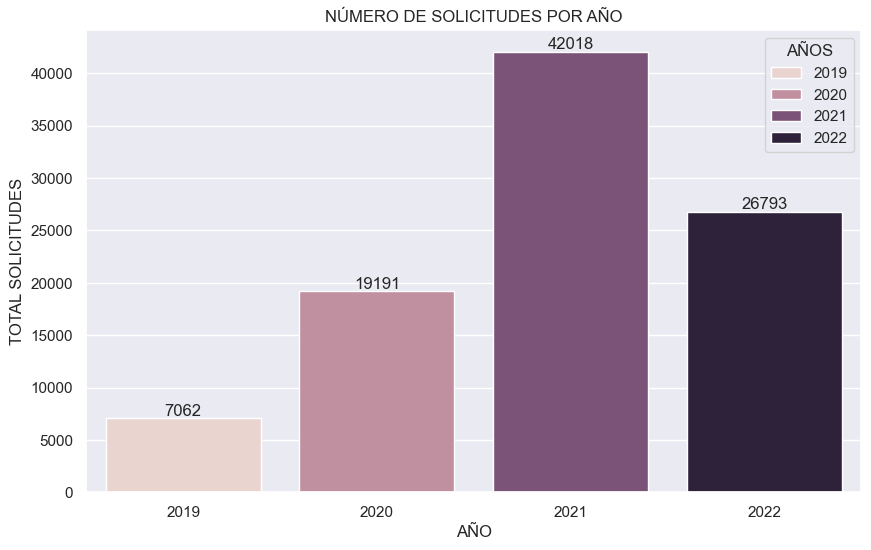

In [15]:
# Visualizamos la variable categórica
fig, ax = plt.subplots(figsize=(10, 6))
g = sns.barplot(df_reportes_por_año, x="año", y="total_solicitudes", hue="año", ax=ax, legend=True)
g.set_title("Número de solicitudes por año".upper())
g.set_xlabel("año".upper())
g.set_ylabel("total solicitudes".upper())
plt.legend(title="AÑOS", loc='upper right')

for i in ax.containers:
    ax.bar_label(i,)
    
plt.show(g)

In [20]:
df_app2['tema_solicitud'].unique().to_list()

['BECAS',
 'QUEJA FUNCIONARIO',
 'MEDIO AMBIENTE',
 'ESPECTÁCULOS PÚBLICOS',
 'INDUSTRIA',
 'MANTENIMIENTO PARQUE / AREA VERDE',
 'PAVIMENTACION',
 'QUEJAS Y DENUNCIAS',
 'APOYO SERVICIOS FUNERARIOS',
 'REGISTRO PÚBLICO DE LA PROPIEDAD',
 'BARBECHO / CHAPONEO',
 'ALARMAS VECINALES',
 'REGISTRO CIVIL',
 'MALTRATO INFANTIL',
 'CULTURA Y RECREACIÓN',
 'SOLICITUD DE AUDIENCIA',
 'ASESORIAS',
 'SOLICITUD DE VOLANTEO',
 'PRUEBA BARRIO ADENTRO',
 'INFORMACIÓN',
 'FALLA DE ALTAVOZ, ALERTA SÍSMICA',
 'REINSCRIPCION AL CENDI',
 'ASISTENCIA VETERINARIA',
 'FOMENTO ECONÓMICO Y EMPLEO',
 'LIMPIEZA VIA PUBLICA',
 'MANTENIMIENTO DE COLADERA / ALCANTARILLA',
 'MANTENIMIENTO SEMÁFOROS',
 'CRÉDITO DE VIVIENDA',
 'CONSTRUCCIONES Y OBRAS',
 'PODA / RETIRO ARBOL',
 'COVID',
 'CHATARRIZACIÓN',
 'RECOLECCIÓN BASURA',
 'SOLICITUD/SEGURO DE DESEMPLEO',
 'VENTA DE ALCOHOL / DROGA',
 'RECONSTRUCCIÓN',
 'REGISTRO FERIAS INDIGENAS',
 'ASESORÍA JURÍDICA',
 'ASISTENCIA SOCIAL',
 'RETIRO AMBULANTE',
 'OTRO',
 'ALUMBR

In [16]:
# Filtraremos los temas de interés
# 'QUEJAS Y DENUNCIAS', 'OTRO', 'QUEJA DE TRANSPORTE PUBLICO', 'LLAVE CDMX', 'VEHÍCULOS AUTOMOTORES Y TAXIS'
df_app3 = df_app2.filter(
    pl.col('tema_solicitud').is_in(
        ['QUEJAS Y DENUNCIAS', 'OTRO', 'QUEJA DE TRANSPORTE PUBLICO', 'LLAVE CDMX', 'VEHÍCULOS AUTOMOTORES Y TAXIS']
    ))

In [23]:
df_app3.head()

id_folio,fecha_solicitud,hora_solicitud,tipo_de_entrada,tema_solicitud,sexo,edad,estatus,fecha_concluido,alcaldia,colonia_datos,0311_colonia_registro,codigo_postal_solicitud,latitud,longitud
str,date,str,str,str,str,str,str,date,str,str,str,str,f64,f64
"""- 133674""",2019-09-27,"""15:52:14""","""APP CDMX""","""QUEJA DE TRANSPORTE PUBLICO""","""FEMENINO""","""1""","""ATENDIDO""",2019-10-10,"""VENUSTIANO CARRANZA""","""VALLE GOMEZ""","""VALLE GOMEZ""","""00000""",19.456098,-99.119845
"""- 198080""",2019-11-17,"""09:54:41""","""APP CDMX""","""QUEJA DE TRANSPORTE PUBLICO""","""FEMENINO""","""1""","""ATENDIDO""",2019-12-29,"""MIGUEL HIDALGO""","""DANIEL GARZA (AMPL)""","""OBSERVATORIO""","""00000""",19.407029,-99.192459
"""- 9858""",2019-06-09,"""14:59:33""","""APP CDMX""","""VEHÍCULOS AUTOMOTORES Y TAXIS""","""FEMENINO""","""1""","""ATENDIDO""",2019-09-17,"""CUAUHTEMOC""","""CUAUHTEMOC""","""CUAUHTEMOC""","""00000""",19.431291,-99.164121
"""- 9900""",2019-06-09,"""17:36:13""","""APP CDMX""","""QUEJA DE TRANSPORTE PUBLICO""","""FEMENINO""","""1""","""ATENDIDO""",2019-08-22,"""TLALPAN""","""NARCISO MENDOZA-VILLA COAPA SU…","""VILLA COAPA""","""00000""",19.287031,-99.123732
"""- 25389""",2019-06-29,"""07:42:15""","""APP CDMX""","""QUEJA DE TRANSPORTE PUBLICO""","""FEMENINO""","""1""","""ATENDIDO""",2019-09-13,"""ALVARO OBREGON""","""CHIMALISTAC""","""CHIMALISTAC""","""00000""",19.345485,-99.184432


In [17]:
df_por_tema = df_app3.group_by(
    "tema_solicitud"
).agg(
    pl.col("tema_solicitud").count().alias("total_tickets")
).sort("total_tickets", descending=True)
df_por_tema

tema_solicitud,total_tickets
str,u32
"""QUEJA DE TRANSPORTE PUBLICO""",8484
"""OTRO""",3063
"""QUEJAS Y DENUNCIAS""",2332
"""VEHÍCULOS AUTOMOTORES Y TAXIS""",817
"""LLAVE CDMX""",78


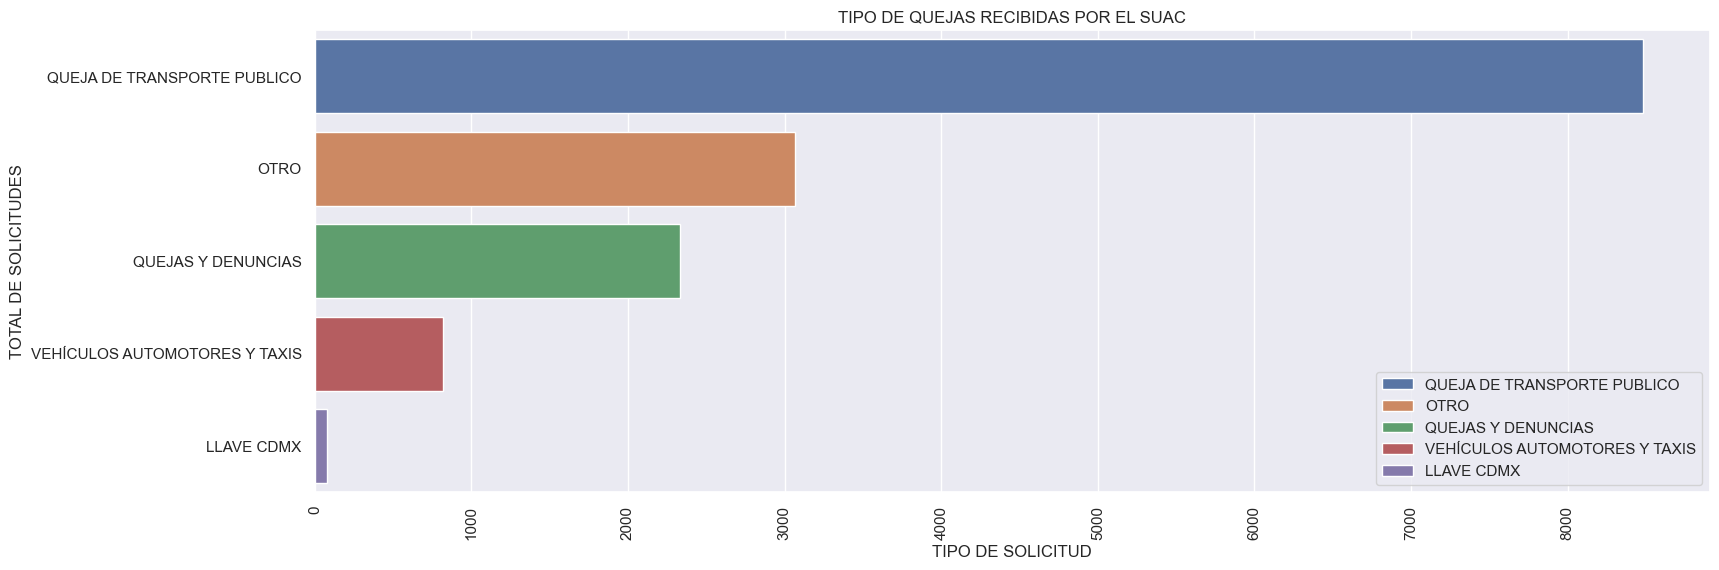

In [19]:
# Visualizamos la variable categórica
fig, ax = plt.subplots(figsize=(18, 6))
g = sns.barplot(df_por_tema, y="tema_solicitud", x='total_tickets', hue="tema_solicitud", legend=True, ax=ax, orient='h')
g.set_title("Tipo de quejas recibidas por el SUAC".upper())
g.set_ylabel("Total de solicitudes".upper())
g.set_xlabel("Tipo de solicitud".upper())
g.set_xticklabels(g.get_xticklabels(), rotation=90)
plt.legend(loc='lower right')

plt.show(g)

In [21]:
# Por Queja de Transporte Público
df_por_fh_solicitud = df_app3.filter(
    pl.col('tema_solicitud') =='QUEJA DE TRANSPORTE PUBLICO'
).group_by(
    "fecha_solicitud"
).agg(
    pl.col("tema_solicitud").count().alias("total_tickets")
).sort("total_tickets", descending=True)
df_por_fh_solicitud

fecha_solicitud,total_tickets
date,u32
2019-12-05,113
2019-12-04,92
2019-12-11,80
2019-12-06,71
2019-12-12,68
…,…
2022-05-11,1
2022-05-02,1
2022-05-17,1


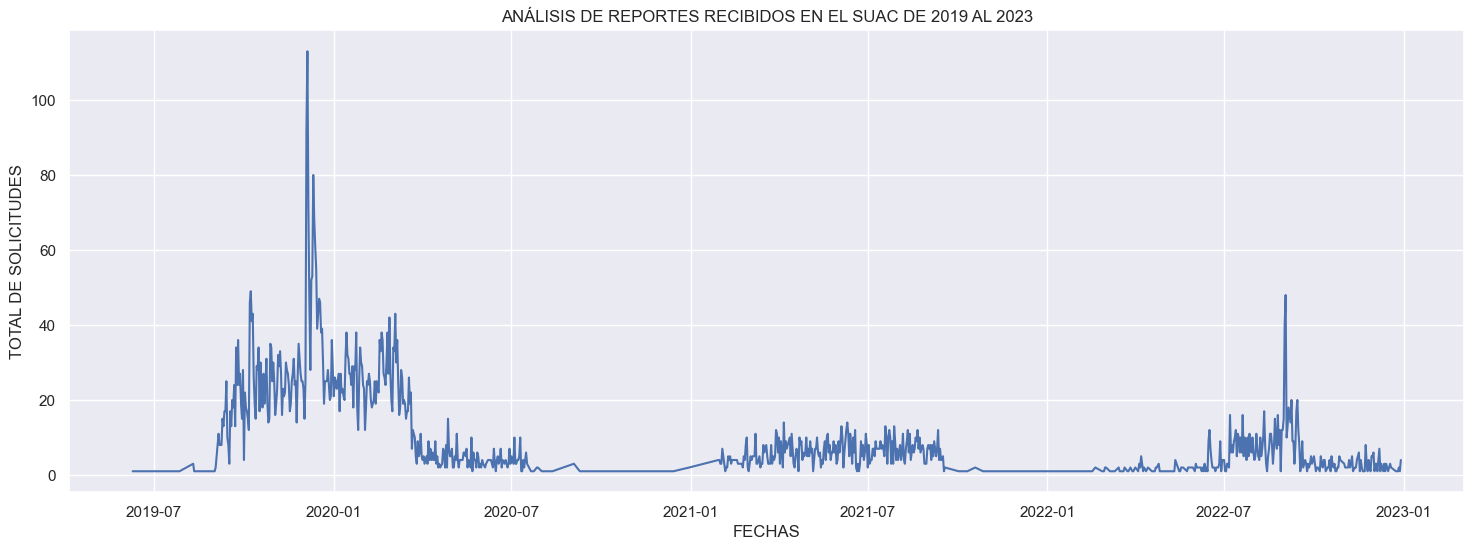

In [22]:
fig, ax = plt.subplots(figsize=(18, 6))
g = sns.lineplot(df_por_fh_solicitud, x="fecha_solicitud", y='total_tickets', ax=ax)
g.set_title("Análisis de Reportes Recibidos en el SUAC de 2019 al 2023".upper())
g.set_ylabel("Total de solicitudes".upper())
g.set_xlabel("Fechas".upper())
plt.show(g)

In [51]:
df_app3

id_folio,fecha_solicitud,hora_solicitud,tipo_de_entrada,tema_solicitud,sexo,edad,estatus,fecha_concluido,alcaldia,colonia_datos,0311_colonia_registro,codigo_postal_solicitud,latitud,longitud
str,date,str,str,str,str,str,str,date,str,str,str,str,f64,f64
"""- 133674""",2019-09-27,"""15:52:14""","""APP CDMX""","""QUEJA DE TRANSPORTE PUBLICO""","""FEMENINO""","""1""","""ATENDIDO""",2019-10-10,"""VENUSTIANO CARRANZA""","""VALLE GOMEZ""","""VALLE GOMEZ""","""00000""",19.456098,-99.119845
"""- 198080""",2019-11-17,"""09:54:41""","""APP CDMX""","""QUEJA DE TRANSPORTE PUBLICO""","""FEMENINO""","""1""","""ATENDIDO""",2019-12-29,"""MIGUEL HIDALGO""","""DANIEL GARZA (AMPL)""","""OBSERVATORIO""","""00000""",19.407029,-99.192459
"""- 9858""",2019-06-09,"""14:59:33""","""APP CDMX""","""VEHÍCULOS AUTOMOTORES Y TAXIS""","""FEMENINO""","""1""","""ATENDIDO""",2019-09-17,"""CUAUHTEMOC""","""CUAUHTEMOC""","""CUAUHTEMOC""","""00000""",19.431291,-99.164121
"""- 9900""",2019-06-09,"""17:36:13""","""APP CDMX""","""QUEJA DE TRANSPORTE PUBLICO""","""FEMENINO""","""1""","""ATENDIDO""",2019-08-22,"""TLALPAN""","""NARCISO MENDOZA-VILLA COAPA SU…","""VILLA COAPA""","""00000""",19.287031,-99.123732
"""- 25389""",2019-06-29,"""07:42:15""","""APP CDMX""","""QUEJA DE TRANSPORTE PUBLICO""","""FEMENINO""","""1""","""ATENDIDO""",2019-09-13,"""ALVARO OBREGON""","""CHIMALISTAC""","""CHIMALISTAC""","""00000""",19.345485,-99.184432
…,…,…,…,…,…,…,…,…,…,…,…,…,…,…
"""- 1738220""",2022-12-29,"""20:11:10""","""APP CDMX""","""QUEJA DE TRANSPORTE PUBLICO""","""NO ESPECIFICADO""","""NA""","""CERRADO""",2023-01-06,"""IZTAPALAPA""","""CUCHILLAS DEL MORAL (U HAB)""","""CUCHILLAS DEL MORAL""","""09020""",19.383519,-99.075658
"""- 1738282""",2022-12-29,"""22:56:59""","""APP CDMX""","""OTRO""","""NO ESPECIFICADO""","""NA""","""CERRADO""",2022-12-30,"""NA""","""NA""","""NA""","""NA""",0.0,0.0
"""- 1512241""",2022-07-30,"""00:25:11""","""APP CDMX""","""OTRO""","""FEMENINO""","""1""","""CERRADO""",2022-09-22,"""CUAUHTEMOC""","""NA""","""CENTRO""","""00000""",0.0,0.0


In [74]:
# dias_resolucion = (df_app3['fecha_concluido'] - df_app3['fecha_solicitud']),
    
df_resolucion = df_app3.filter(
    pl.col('tema_solicitud') == 'QUEJA DE TRANSPORTE PUBLICO'
).with_columns(
    pl.col('id_folio').alias('id_reporte'),
    pl.col('tema_solicitud').alias('tipo_solicitud'),
    (pl.col('fecha_concluido') - pl.col('fecha_solicitud')).alias('dias_resolucion'),
    pl.col('estatus'),
).select(
    'id_reporte',
    'tipo_solicitud',
    'dias_resolucion',
    'estatus'
)

In [75]:
df_resolucion.describe()

statistic,id_reporte,tipo_solicitud,dias_resolucion,estatus
str,str,str,str,str
"""count""","""8484""","""8484""","""8484""","""8484"""
"""null_count""","""0""","""0""","""0""","""0"""
"""mean""",null,null,"""73 days, 22:08:59.745000""",null
"""std""",null,null,null,null
"""min""","""- 1000154""","""QUEJA DE TRANSPORTE PUBLICO""","""0:00:00""","""ATENDIDO"""
"""25%""",null,null,"""18 days, 0:00:00""",null
"""50%""",null,null,"""37 days, 0:00:00""",null
"""75%""",null,null,"""77 days, 0:00:00""",null
"""max""","""- 999441""","""QUEJA DE TRANSPORTE PUBLICO""","""467 days, 0:00:00""","""TURNADO"""
